In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import LSTM,Bidirectional

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company stock prices.xlsx to Company stock prices.xlsx


In [3]:
data=pd.read_excel("Company stock prices.xlsx")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


In [12]:
df=data[['Date','Close']]

In [6]:
df

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [13]:
df.set_index('Date',inplace=True)

In [14]:
df

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999
...,...
2023-10-10,373.320007
2023-10-11,365.929993
2023-10-12,361.200012


In [15]:
len(df)

753

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
min_max=MinMaxScaler()

In [18]:
df1=min_max.fit_transform(np.array(df))

In [19]:
df1

array([[0.69357719],
       [0.68348813],
       [0.61425415],
       [0.60698243],
       [0.6127884 ],
       [0.61271223],
       [0.61402572],
       [0.60890503],
       [0.64311275],
       [0.58891721],
       [0.6048694 ],
       [0.61077058],
       [0.62929265],
       [0.66129218],
       [0.66313862],
       [0.57894236],
       [0.59748342],
       [0.61750935],
       [0.60991394],
       [0.6024328 ],
       [0.59531335],
       [0.59822585],
       [0.60043404],
       [0.60591642],
       [0.61271223],
       [0.59059239],
       [0.60250896],
       [0.60654458],
       [0.61865146],
       [0.61739514],
       [0.64381708],
       [0.64153279],
       [0.63037765],
       [0.63188152],
       [0.6651375 ],
       [0.65919815],
       [0.62291557],
       [0.63717353],
       [0.64122821],
       [0.67777732],
       [0.6727519 ],
       [0.68236507],
       [0.69772715],
       [0.70067771],
       [0.69013168],
       [0.68712407],
       [0.66266272],
       [0.661

In [21]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [22]:
print(train_data.size)
print(test_data.size)

564
189


#### It takes a dataset and creates input sequences

In [23]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX),np.array(dataY)

#### creating the sequence by taking the size of 100
#### creating the training and testing datasets

In [24]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [25]:
print(x_train)

[[0.69357719 0.68348813 0.61425415 ... 0.64374098 0.67899566 0.66940155]
 [0.68348813 0.61425415 0.60698243 ... 0.67899566 0.66940155 0.67364654]
 [0.61425415 0.60698243 0.6127884  ... 0.66940155 0.67364654 0.68084221]
 ...
 [0.14235132 0.15000381 0.14237038 ... 0.27284325 0.28397927 0.28325595]
 [0.15000381 0.14237038 0.1145397  ... 0.28397927 0.28325595 0.30680349]
 [0.14237038 0.1145397  0.11075156 ... 0.28325595 0.30680349 0.30627049]]


In [26]:
print('x_train_shape',x_train.shape)
print('y_train_shape',y_train.shape)
print('x_test_shape',x_test.shape)
print('y_test_shape',y_test.shape)

x_train_shape (463, 100)
y_train_shape (463,)
x_test_shape (88, 100)
y_test_shape (88,)


#### reshape input to be [samples,time steps,features] which is required for lstm

In [27]:
x_train=x_train.reshape(463,100,1)
x_test=x_test.reshape(88,100,1)

#### By default, the LSTM layers in Keras use the hyperbolic tangent (tanh) activation function for the recurrent activation and the sigmoid activation function for the input and forget gates. These default activation functions are generally suitable for many tasks, such as sequence modeling and time series analysis.
#### sequence_length and num_features are given as input shape.

### Model Building

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Compiling

#### During training, the model will use the 'mean_squared_error' loss and the 'adam' optimizer to adjust its weights in order to minimize the mean squared error and make better predictions on the training data.

In [29]:
model.compile(loss='mean_squared_error',optimizer='adam')

### Fitting the model

In [30]:
lstm=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=40)

Epoch 1/100
12/12 [==============================] - 10s 267ms/step - loss: 0.0634 - val_loss: 0.0083
Epoch 2/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0176 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0102 - val_loss: 0.0032
Epoch 4/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0097 - val_loss: 0.0032
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0089 - val_loss: 0.0035
Epoch 7/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0107 - val_loss: 0.0048
Epoch 8/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0081 - val_loss: 0.0026
Epoch 9/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0082 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0073 - val_l

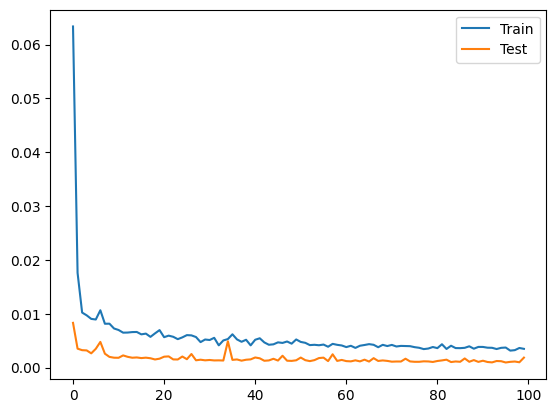

In [31]:
plt.plot(range(100),lstm.history['loss'],label='Train')
plt.plot(range(100),lstm.history['val_loss'],label='Test')
plt.legend()

#### Error  decresing with increasing the epochs

In [32]:
pred=model.predict(x_test)

3/3 [==============================] - 2s 33ms/step


####  RMSE measures the average magnitude of the errors between the predicted values and the actual values, with lower values indicating better model performance.

In [33]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

0.04305229787278065

#### converting the data to orginal scale

In [34]:
predd=min_max.inverse_transform(pred)
y_testt=y_test.reshape(-1,1)
y_testt=min_max.inverse_transform(y_testt)

In [35]:
y_testt=pd.DataFrame(y_testt)
predd=pd.DataFrame(predd)

In [36]:
d=data[['Date']][664:-1]
dd=d.reset_index()

#### Setting the date column as index

In [37]:
fore=pd.concat([dd,predd,y_testt],axis=1)
fore.set_index('Date',inplace=True)

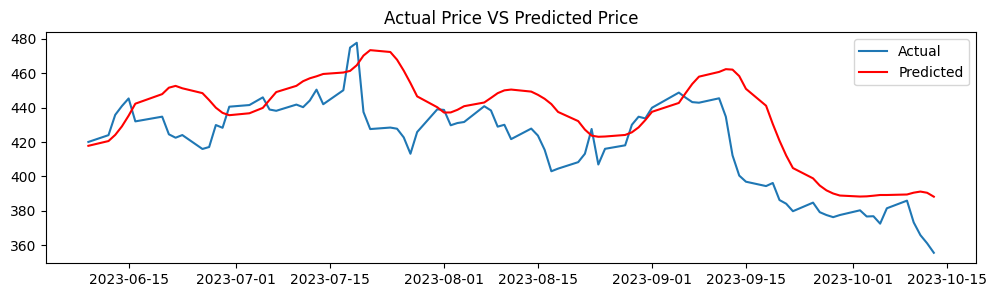

In [38]:
plt.figure(figsize=(12,3))
plt.plot(fore.iloc[:,2],label='Actual')
plt.plot(fore.iloc[:,1],label='Predicted',color='red')
plt.legend()
plt.title('Actual Price VS Predicted Price')
plt.show()

In [39]:
predicted_price = []

def stock_prediction(days):
    t = x_test[-1]
    tt = t.reshape(1, 100, 1)
    p = model.predict(tt)
    predicted_price.append(p[0])

    for i in range(days-1):
        stockValue_list = list(t)
        stockValue_list.append(p[0])
        testing_array = np.array(stockValue_list[-100:])
        p = model.predict(testing_array.reshape(1, 100, 1))
        predicted_price.append(p[0])
    predicted_pricee=min_max.inverse_transform(predicted_price)
    return predicted_pricee

In [ ]:
stock_prediction(3)

1/1 [==============================] - 0s 51ms/step


array([[370.89673144],
       [368.52463389],
       [368.3557709 ]])

**Another LSTM Model**

In [40]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [41]:
data = df.values

In [42]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [43]:
sequence_length = 10

In [44]:
sequences, labels = [], []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length])

In [45]:
sequences = np.array(sequences)
labels = np.array(labels)

In [46]:
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))

In [47]:
X_train, X_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

In [48]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
19/19 [==============================] - 2s 7ms/step - loss: 0.0788
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 11/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 12/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/50
19/19 [==============================

In [51]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

5/5 [==============================] - 0s 4ms/step - loss: 7.3220e-04
Test loss: 0.0007321983575820923


1) Model Type: It's a sequential model, which means that the layers are stacked sequentially.

2) Layers:

(i) LSTM Layer (lstm_3): This is a Long Short-Term Memory (LSTM) layer, which is a type of recurrent neural network (RNN) layer. It has 10,400 parameters, and it outputs a tensor with a shape of (None, 50), meaning it has 50 units or neurons.

(ii) Dense Layer (dense_1): This is a fully connected layer (dense layer) with 1 neuron (output unit). It has 51 parameters.

3) Total Parameters: The model has a total of 10,451 parameters, which include weights and biases. These parameters are the learnable components of the model that are adjusted during training.

4) Trainable and Non-trainable Parameters: All the parameters are trainable, which means they will be updated during the training process. Non-trainable parameters usually correspond to things like the configuration of the layer (e.g., bias or activation function) and are not updated during training.

5) Size: The model has a size of 40.82 kilobytes.

Test Loss: 0.0007321983575820923
This value is close to zero, indicating that the model's predictions are very close to the actual values in the test data.